<a href="https://colab.research.google.com/github/arthur-siqueira/metodos-numericos/blob/main/aritmetica_ponto_flutuante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercício 1.1**

In [1]:
import numpy as np

# Parâmetros
a = 10
x0 = 1.0
n_iter = 10

aprox = [x0]
erros = []

# Raiz exata
raiz_exata = np.sqrt(a)

for i in range(n_iter):
    x_new = (aprox[-1] + a/aprox[-1]) / 2
    aprox.append(x_new)
    erro_rel = abs((x_new - raiz_exata)/raiz_exata)
    erros.append(erro_rel)

import pandas as pd
df1 = pd.DataFrame({
    "Iteração": range(1, n_iter+1),
    "Aproximação": aprox[1:],
    "Erro Relativo": erros
})
df1

,Iteração,Aproximação,Erro Relativo
0,1,5.500000,7.392527e-01
1,2,3.659091,1.571061e-01
2,3,3.196005,1.066555e-02
3,4,3.162456,5.627673e-05
4,5,3.162278,1.583446e-09
5,6,3.162278,1.404333e-16
6,7,3.162278,1.404333e-16
7,8,3.162278,1.404333e-16
8,9,3.162278,1.404333e-16
9,10,3.162278,1.404333e-16


**Exercício 1.2**

In [2]:
# Algoritmo do epsilon
e = 1.0
while 1.0 + e > 1.0:
    e = e / 2.0
epsilon_maquina = e * 2
epsilon_maquina, np.finfo(float).eps

(2.220446049250313e-16, np.float64(2.220446049250313e-16))

**Exercício 1.3**

In [3]:
x = 1/3
valores = []
for i in range(10):
    valores.append(x)
    x = 4*x - 1

valores


[0.3333333333333333,
 0.33333333333333326,
 0.33333333333333304,
 0.33333333333333215,
 0.3333333333333286,
 0.3333333333333144,
 0.33333333333325754,
 0.33333333333303017,
 0.3333333333321207,
 0.3333333333284827]

**Exercício 1.4**

In [4]:
def f1(mu): return np.exp(1/mu) / (1 + np.exp(1/mu))
def f2(mu): return 1 / (np.exp(-1/mu) + 1)

mus = [0.1, 0.01, 0.001, 1e-6]
resultados = [(mu, f1(mu), f2(mu)) for mu in mus]

pd.DataFrame(resultados, columns=["μ", "f1", "f2"])

/tmp/ipython-input-3861688968.py:1: RuntimeWarning: overflow encountered in exp
  def f1(mu): return np.exp(1/mu) / (1 + np.exp(1/mu))
/tmp/ipython-input-3861688968.py:1: RuntimeWarning: invalid value encountered in scalar divide
  def f1(mu): return np.exp(1/mu) / (1 + np.exp(1/mu))


,μ,f1,f2
0,0.100000,0.999955,0.999955
1,0.010000,1.000000,1.000000
2,0.001000,NaN,1.000000
3,0.000001,NaN,1.000000


**Exercício 1.5**

In [5]:
xs = [1e-12, 1e-15, 1e-17]
resultados = [(x, ((1+x) - 1)/x) for x in xs]
pd.DataFrame(resultados, columns=["x", "f(x)"])

,x,f(x)
0,1.000000e-12,1.000089
1,1.000000e-15,1.110223
2,1.000000e-17,0.000000


**Exercício 1.6**

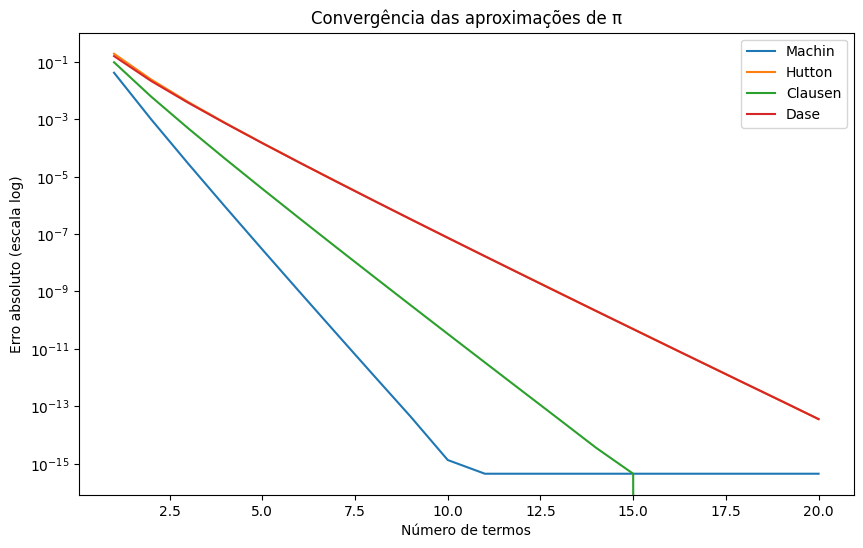

In [6]:
import matplotlib.pyplot as plt

def arctan_series(x, n_terms):
    return sum([((-1)**k)*(x**(2*k+1))/(2*k+1) for k in range(n_terms)])

def pi_machin(n):   return 4*(4*arctan_series(1/5, n) - arctan_series(1/239, n))
def pi_hutton(n):   return 4*(arctan_series(1/2, n) + arctan_series(1/3, n))
def pi_clausen(n):  return 4*(2*arctan_series(1/3, n) + arctan_series(1/7, n))
def pi_dase(n):     return 4*(arctan_series(1/2, n) + arctan_series(1/5, n) + arctan_series(1/8, n))

metodos = {"Machin": pi_machin, "Hutton": pi_hutton, "Clausen": pi_clausen, "Dase": pi_dase}

n_terms = 20
true_pi = np.pi

plt.figure(figsize=(10,6))
for nome, func in metodos.items():
    erros = [abs(func(n) - true_pi) for n in range(1, n_terms+1)]
    plt.plot(range(1, n_terms+1), erros, label=nome)

plt.yscale("log")
plt.xlabel("Número de termos")
plt.ylabel("Erro absoluto (escala log)")
plt.title("Convergência das aproximações de π")
plt.legend()
plt.show()